In [1]:
import sqlite3
import datetime
import random
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
con = sqlite3.connect('dsa.db')
cur = con.cursor()

In [41]:
# função para criar uma tabela
def creat_table():
    cur.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
                'prod_name TEXT, valor REAL)')

In [42]:
def sqlite_close():
        cur.close()
        con.close()

In [5]:
def data_insert():
    cur.execute("INSERT INTO produtos VALUES(10, '2021-05-02 14:32:11', 'Teclado', 90)")
    con.commit()

In [6]:
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Mouse'
    new_value = random.randrange(50,100)
    cur.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?,?,?)", (new_date, new_prod_name, new_value))
    con.commit()

In [11]:
creat_table()

In [14]:
# rode apenas se for a primeira vez, pra não dar erro =)
data_insert()

IntegrityError: UNIQUE constraint failed: produtos.id

## Insert usando variáveis

In [18]:
data_insert_var()

In [19]:
for i in range(10):
    data_insert_var()

In [4]:
def leitura_todos_dados():
    cur.execute("SELECT * FROM produtos")
    for linha in cur.fetchall():
        print(linha)

In [8]:
# leitura de registros específicos
def leitura_registros():
    cur.execute("SELECT * FROM produtos WHERE valor > 60.0")
    for linha in cur.fetchall():
        print(linha)

In [15]:
def leitura_colunas():
    cur.execute("SELECT * FROM produtos")
    for linha in cur.fetchall():
        print(linha[3])

In [5]:
leitura_todos_dados()

(10, '2021-05-02 14:32:11', 'Teclado', 90.0)
(11, '2021-07-27 17:58:46.553239', 'Monitor', 59.0)
(12, '2021-07-27 18:10:03.725860', 'Cadeira Gamer', 900.0)
(13, '2021-07-27 18:13:39.350201', 'Mouse', 70.0)
(14, '2021-07-27 18:39:02.684774', 'Mouse', 94.0)
(15, '2021-07-27 18:39:02.696213', 'Mouse', 80.0)
(16, '2021-07-27 18:39:02.703935', 'Mouse', 89.0)
(18, '2021-07-27 18:39:02.719965', 'Mouse', 51.0)
(20, '2021-07-27 18:39:02.742804', 'Mouse', 56.0)
(21, '2021-07-27 18:39:02.757533', 'Mouse', 97.0)


In [13]:
leitura_registros()

(10, '2021-05-02 14:32:11', 'Teclado', 90.0)
(12, '2021-07-27 18:10:03.725860', 'Cadeira Gamer', 78.0)
(13, '2021-07-27 18:13:39.350201', 'Mouse', 81.0)
(14, '2021-07-27 18:39:02.684774', 'Mouse', 94.0)
(15, '2021-07-27 18:39:02.696213', 'Mouse', 80.0)
(16, '2021-07-27 18:39:02.703935', 'Mouse', 89.0)
(17, '2021-07-27 18:39:02.712400', 'Mouse', 91.0)
(19, '2021-07-27 18:39:02.727692', 'Mouse', 62.0)
(21, '2021-07-27 18:39:02.757533', 'Mouse', 97.0)
(22, '2021-07-27 18:39:02.765583', 'Mouse', 64.0)
(23, '2021-07-27 18:39:02.774162', 'Mouse', 91.0)


In [16]:
leitura_colunas()

90.0
59.0
78.0
81.0
94.0
80.0
89.0
91.0
51.0
62.0
56.0
97.0
64.0
91.0


## update e delete

### update

In [43]:
def atualiza_dados():
    cur.execute("UPDATE produtos SET valor = 900 WHERE prod_name = 'Cadeira Gamer'")
    con.commit()

In [51]:
def remove_dados():
    cur.execute("DELETE FROM produtos WHERE valor = 64.0")
    con.commit()

In [48]:
atualiza_dados()

In [49]:
leitura_todos_dados()

(10, '2021-05-02 14:32:11', 'Teclado', 90.0)
(11, '2021-07-27 17:58:46.553239', 'Monitor', 59.0)
(12, '2021-07-27 18:10:03.725860', 'Cadeira Gamer', 900.0)
(13, '2021-07-27 18:13:39.350201', 'Mouse', 70.0)
(14, '2021-07-27 18:39:02.684774', 'Mouse', 94.0)
(15, '2021-07-27 18:39:02.696213', 'Mouse', 80.0)
(16, '2021-07-27 18:39:02.703935', 'Mouse', 89.0)
(18, '2021-07-27 18:39:02.719965', 'Mouse', 51.0)
(20, '2021-07-27 18:39:02.742804', 'Mouse', 56.0)
(21, '2021-07-27 18:39:02.757533', 'Mouse', 97.0)
(22, '2021-07-27 18:39:02.765583', 'Mouse', 64.0)


In [52]:
remove_dados()

In [11]:
leitura_todos_dados()

(10, '2021-05-02 14:32:11', 'Teclado', 90.0)
(11, '2021-07-27 17:58:46.553239', 'Monitor', 59.0)
(12, '2021-07-27 18:10:03.725860', 'Cadeira Gamer', 900.0)
(13, '2021-07-27 18:13:39.350201', 'Mouse', 70.0)
(14, '2021-07-27 18:39:02.684774', 'Mouse', 94.0)
(15, '2021-07-27 18:39:02.696213', 'Mouse', 80.0)
(16, '2021-07-27 18:39:02.703935', 'Mouse', 89.0)
(18, '2021-07-27 18:39:02.719965', 'Mouse', 51.0)
(20, '2021-07-27 18:39:02.742804', 'Mouse', 56.0)
(21, '2021-07-27 18:39:02.757533', 'Mouse', 97.0)


### usando matplolib para visualização em grafico

In [6]:
def dados_grafico():
    cur.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados = cur.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
    plt.bar(ids, valores)
    plt.show()

<IPython.core.display.Javascript object>


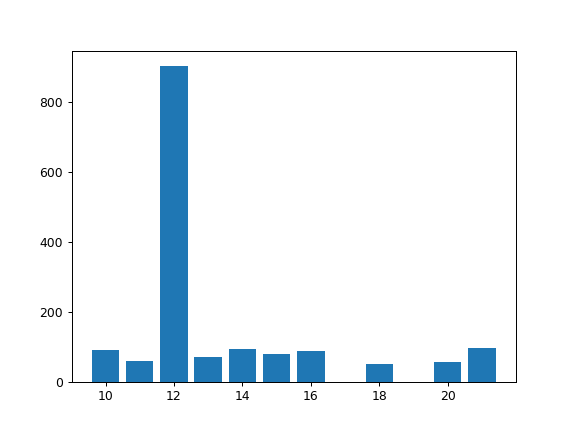

In [7]:
dados_grafico()